# <font color=4284A3>Predicting Heart Rate based on Exercise Data</font>
___

>#### <font color=4284A3> Group name: <font color=00000>Analytics_Group52

>#### <font color=4284A3> Members</font>:
- Anjali Manoj- S3842387
- Anuj Sharma- S3820112
- Sai Ramishetty- S3841545

## Introduction

The main aim of this project is to have the ability to predict the Heart Rate of an individual using Exercise Data. We will utilise Python 3 and Jupyter Notebook along with a range of statistical modules such as **statsmodels** and **patsy** to complete the analysis. This dataset was collected from the OpenML website and the URL is https://www.openml.org/d/41937 (Nada Hamdy,2019). Detailed APA reference is available at the bottom of the report. The report has the following contents listed by the "Table of Contents" section.

# <font color=4284A3>Table of Contents</font> <a id='1006'></a> 

>- **[Overview](#1000):** This section will explain the dataset and state the main objective of the project.
- **[Data Preparation](#1001):** This section will show steps of eliminating unnecessary contents that interfere with the analysis.
- **[Data Exploration](#1002):** This section will dig deeper and highlight the relationships within the dataset.
- **[Statistical Modelling and Performance Evaluation](#1003):** This crucial section will use all the available features to predict the target characteristic using the full model. Then using p-values for backwards variable selection to achieve the reduced model, another check is done using the new model.
- **[Summary and Conclusions](#1004):** This final section summarises our work and showcases the findings of the project.
- **[References](#1005):** Contains detailed APA referenced sources.

#  <font color=4284A3>Overview</font> <a id='1000'></a>
_____

## Source of Dataset

The OpenML provided the exercise dataset and it was the only viable option as our team were looking for data relating to physical activity. The exercise dataset has 15000 records and eight attributes in total. These observations include the details of users along with the heart rate and body temperature after exercising. It contains a good number of independent variables and one available dependent variable, which is the Heart rate.

## Project Goal

The overall aim of this study is to predict the heart rate using multiple linear regression within an acceptable margin of error.

## What is the Target Feature

The target feature of the project is the heart rate as it is a continuous numerical variable and dependent on other variables present in the exercise dataset. Although our team initially thought body temperature could also be a dependent variable, we later concluded that heart rate is the only dependent variable after visiting the following website: https://pubmed.ncbi.nlm.nih.gov/19700579/#:~:text=Conclusion%3A%20Body%20temperature%20is%20an%20independent%20determinant%20of,is%20also%20an%20independent%20determinant%20of%20respiratory%20rate.

## Features of Variables in Dataset

The description of the exercise dataset variables is below:
- **User_ID**: categorical and nominal(despite Jupyter Notebook showing it's int64). Has unique numbers to identify each person and list their details such as gender. 
- **Gender**: categorical and nominal. Shows whether the user is Male or Female.
- **Age**: continuous numerical variable, units are years. Shows how old each user is.
- **Height**: continuous numerical variable, units are centimetres. Shows how tall each user is.
- **Weight**: continuous numerical variable, units are kilograms. Shows how large or lean a user is.
- **Duration**: continuous numerical variable, units are minutes. Shows the amount of time a user spends on exercise.
- **Heart_rate**: continuous numerical variable, units are BPM. Shows the heart rate of each user.
- **Body_Temp**: continuous numerical variable,  units are Celsius. Shows the temperature of each user while they were exercising.

All the variables listed above are pretty much straightforward and there is no confusion as to what each of them describes, and as it can be noticed, most of the variables listed are numerical variables while User_ID and Gender are the only categorical variables.

# <font color=4284A3>Data Preparation</font> <a id='1001'></a>
-----

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
exercise_df=pd.read_csv('Analytics_Group52_Data.csv')
exercise_df = exercise_df.round(3)

## Data Cleaning and Transformation

Checking the shape of the dataset to make sure it has downloaded correctly and also seeing if the data matches the description.

In [2]:
print(f"Shape of the exercise dataset is {exercise_df.shape} \n")
print(f"Data types that are 'object' indicates a string type: \n{exercise_df.dtypes}")

Shape of the exercise dataset is (15000, 8) 

Data types that are 'object' indicates a string type: 
User_ID         int64
Gender         object
Age             int64
Height          int64
Weight          int64
Duration        int64
Heart_Rate      int64
Body_Temp     float64
dtype: object


Having a look at the data through 10 samples:

In [3]:
exercise_df.sample(n=10, random_state=7)

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
404,17985735,male,26,182,83,27,107,41.0
5221,13896084,female,23,171,67,11,94,40.2
3357,17825244,male,65,189,98,27,125,40.9
7336,15032148,male,30,187,88,10,94,40.2
8313,11537400,female,49,168,70,15,98,39.9
7716,11592559,female,55,159,59,26,108,40.9
5943,11920824,male,35,166,69,22,96,40.4
14689,16605012,female,62,166,68,15,96,40.3
100,16417986,male,74,201,107,14,96,40.1
11414,17902303,male,55,184,86,2,83,37.6


Dropping ID like columns that provide no insightful information:

In [4]:
exercise_df=exercise_df.drop(columns=['User_ID'])

## Checking for Missing Values

In [5]:
print(f"The number of missing values for each attribute in the exercise data set:\n\n{exercise_df.isnull().sum()}")

The number of missing values for each attribute in the exercise data set:

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64


In terms of null/missing values, there are none in the dataset on the surface level, meaning that it is possible to have negative values.

## Checking for Negative Values

In [6]:
if exercise_df['Age'].all()<0:
    print("Values in Age column are negative")
else:
    print("All good in column Age")
###############
if exercise_df['Height'].all()<0:
    print("Values in Height column are negative")
else:
    print("All good in column Height")
###############
if exercise_df['Weight'].all()<0:
    print("Values in Weight column are negative")
else:
    print("All good in column Weight")
############### 
if exercise_df['Duration'].all()<0:
    print("Values in Duration column are negative")
else:
    print("All good in column Duration")
###############
if exercise_df['Heart_Rate'].all()<0:
    print("Values in Heart_Rate column are negative")
else:
    print("All good in column Heart_Rate")
###############
if exercise_df['Body_Temp'].all()<0:
    print("Values in Body_Temp column are negative")
else:
    print("All good in column Body_Temp")

All good in column Age
All good in column Height
All good in column Weight
All good in column Duration
All good in column Heart_Rate
All good in column Body_Temp


All our attributes have to be positive to be taken into account, so we did a negative value check. As there are no negative values in each column, we can move on to the next segment.

## Summary Statistics

In [7]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of continuous features(int64) in exercise_df </b>'))
exercise_df.describe(include='int64').round(3)

,Age,Height,Weight,Duration,Heart_Rate
count,15000.00,15000.000,15000.000,15000.000,15000.000
mean,42.79,174.465,74.967,15.531,95.519
std,16.98,14.258,15.036,8.319,9.583
min,20.00,123.000,36.000,1.000,67.000
25%,28.00,164.000,63.000,8.000,88.000
50%,39.00,175.000,74.000,16.000,96.000
75%,56.00,185.000,87.000,23.000,103.000
max,79.00,222.000,132.000,30.000,128.000


In [8]:
display(HTML('<b>Table 2: Summary of continuous features(float64) in exercise_df</b>'))
exercise_df.describe(include='float64').round(3)

,Body_Temp
count,15000.000
mean,40.025
std,0.779
min,37.100
25%,39.600
50%,40.200
75%,40.600
max,41.500


In [9]:
display(HTML('<b>Table 3: Summary of categorical features in exercise_df</b>'))
exercise_df.describe(include='object')

,Gender
count,15000
unique,2
top,female
freq,7553


Table 3 shows the attribute of 'gender' has 2 distinct values, showing that it has no issues.

## Continuous Features
Majority of the continuous attributes gives useful information on each individual, so no values are being dropped as of that reason.

In [10]:
exercise_df['Age'].describe()

count    15000.000000
mean        42.789800
std         16.980264
min         20.000000
25%         28.000000
50%         39.000000
75%         56.000000
max         79.000000
Name: Age, dtype: float64

In [11]:
exercise_df['Heart_Rate'].describe()

count    15000.000000
mean        95.518533
std          9.583328
min         67.000000
25%         88.000000
50%         96.000000
75%        103.000000
max        128.000000
Name: Heart_Rate, dtype: float64

In [12]:
exercise_df['Heart_Rate'].unique()

array([105,  94,  88, 100,  81,  96,  95,  97,  90,  74,  93,  82, 104,
        89,  85,  77,  84,  80,  83,  78, 106, 102,  91, 114,  92, 108,
        98,  86,  79, 113,  99, 111, 101, 109,  76, 103, 110,  73, 107,
       115, 112,  87, 116, 118, 119, 123,  75,  69, 120, 117,  71, 121,
        70,  72,  67, 122, 125,  68, 128], dtype=int64)

The age range appears to be reasonable as the minimum and maximum ages are 20 and 79 respectively. Variables like body temperature or duration the exercise lasted are already calculated, hence, they do not need to be defined. As seen in Table 1, where it shows a summary of the continuous features, none of the values including the dependent variable  seems to have no issues with it thus none of them need to be replaced or removed.

## Categorical Features

In [13]:
categoricalColumns = exercise_df.columns[exercise_df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(exercise_df[col].unique())

Unique values for Gender
['male' 'female']


Before in table 3, it was stated that the attribute of 'gender' has 2 distinct values but the fact if these were useful or not are seen here as those two values are 'male' or 'female'. This makes the attribute clean of error in terms of the categorical values.

## Fixing Column Names

In [14]:
exercise_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190,94,29,105,40.8
1,female,20,166,60,14,94,40.3
2,male,69,179,79,5,88,38.7
3,female,34,179,71,13,100,40.5
4,female,27,154,58,10,81,39.8


As seen above, none of the columns have any problem in their naming and therefore need no alterations.

# <font color=4284A3>Data Exploration</font> <a id='1002'></a>
------
Now our dataset is polished and ready for the exploration

## Univariate Visualisation

**Histogram of gender:**

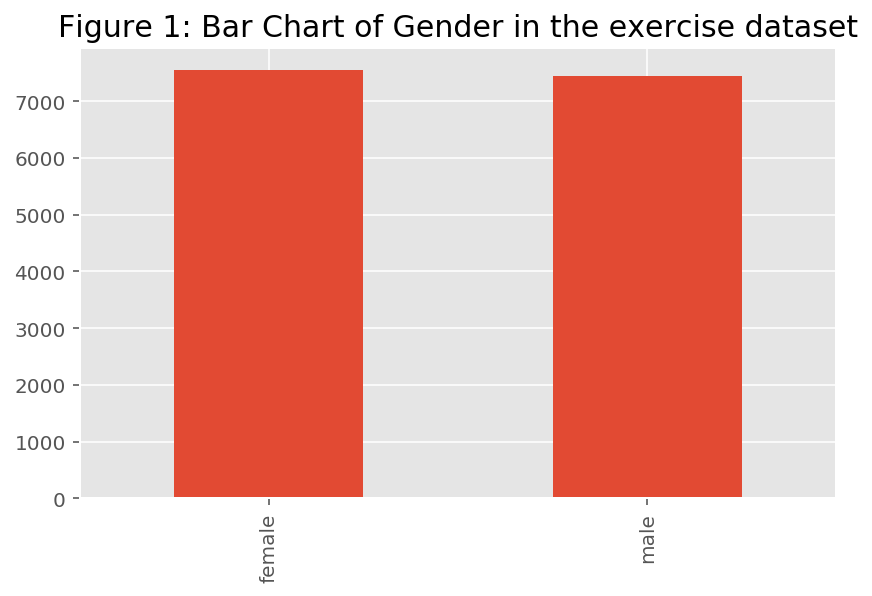

In [15]:
ax = exercise_df['Gender'].value_counts().plot(kind = 'bar')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.tight_layout()
plt.title('Figure 1: Bar Chart of Gender in the exercise dataset', fontsize = 15)
plt.show();

We realize that the gender ratio of the dataset we have is almost 1:1, which is ideal for evaluation.

**Histogram of Age:**

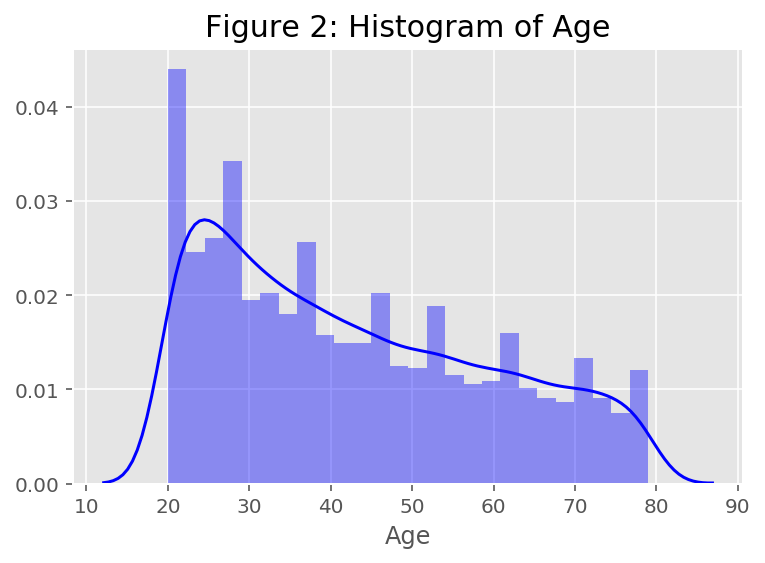

In [16]:
sns.distplot(exercise_df['Age'],color="blue").set_title('Figure 2: Histogram of Age', fontsize = 15)
plt.show();

With the help of Figure 2, we realize that our box plot is right-skewed and our data participants come from a middle-age group mostly in the early '20s to early '50s.

**Kdeplot of Weight:**

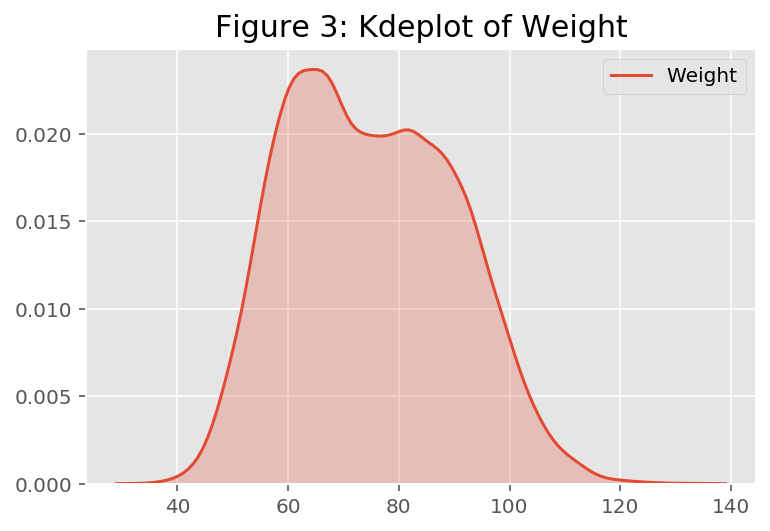

In [17]:
sns.kdeplot(exercise_df['Weight'], shade=True).set_title('Figure 3: Kdeplot of Weight', fontsize = 15)
plt.show();

With figure 3, we understand that most of the participant falls under normal weight category (between the 60 to 85 kg) according to their age implying the participants are healthy.

**Histogram of Heart Rate with KDE:**

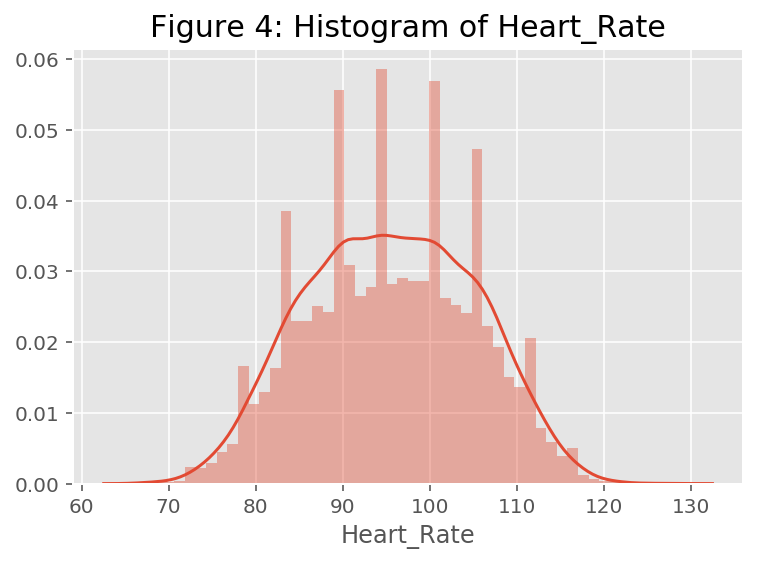

In [18]:
sns.distplot(exercise_df['Heart_Rate'], kde = True).set_title('Figure 4: Histogram of Heart_Rate', fontsize = 15)
plt.show();

**Kdeplot of Heart Rate:**

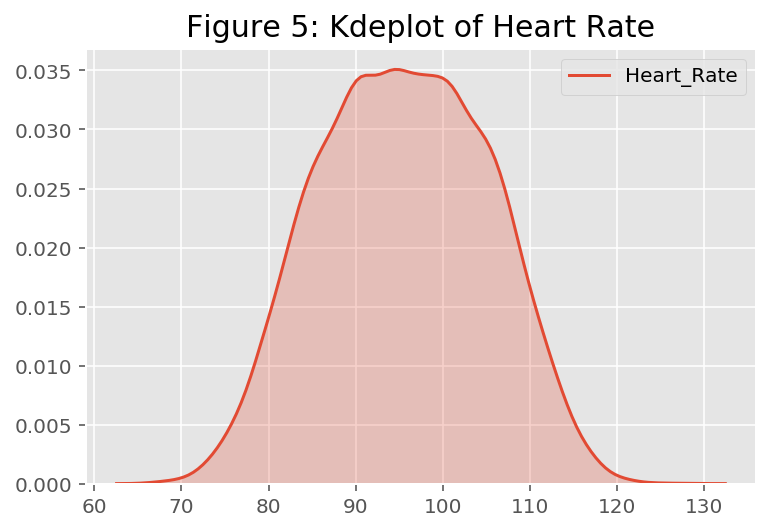

In [19]:
sns.kdeplot(exercise_df['Heart_Rate'], shade=True).set_title('Figure 5: Kdeplot of Heart Rate', fontsize = 15)
plt.show();

A KDE plot for Heart Rate of the participants provides a better visualization and shows the mean value of the heart rate around 95 BPM with majority being aorund 85 to 105 BPM.

**Kdeplot of Body Temperature:**

Text(0.5, 1.0, 'Figure 6: Kdeplot of Body Temperature')

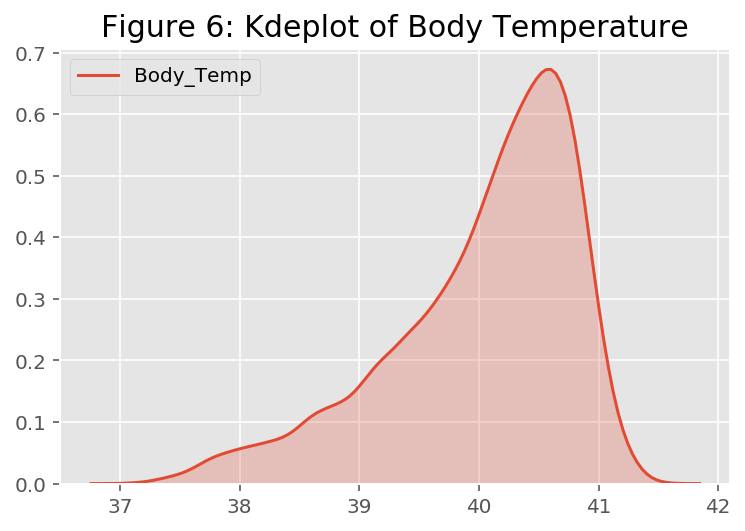

In [20]:
sns.kdeplot(exercise_df['Body_Temp'], shade=True).set_title('Figure 6: Kdeplot of Body Temperature', fontsize = 15)

Figure 7 shows us how most of the participants fall under the higher end in terms of body temp for the majority being around 40˚C with the very small difference of 4.400 Celsius for the min and max.

## Multivariate Visualisation

**Scatter plot for Age and Heart Rate:**

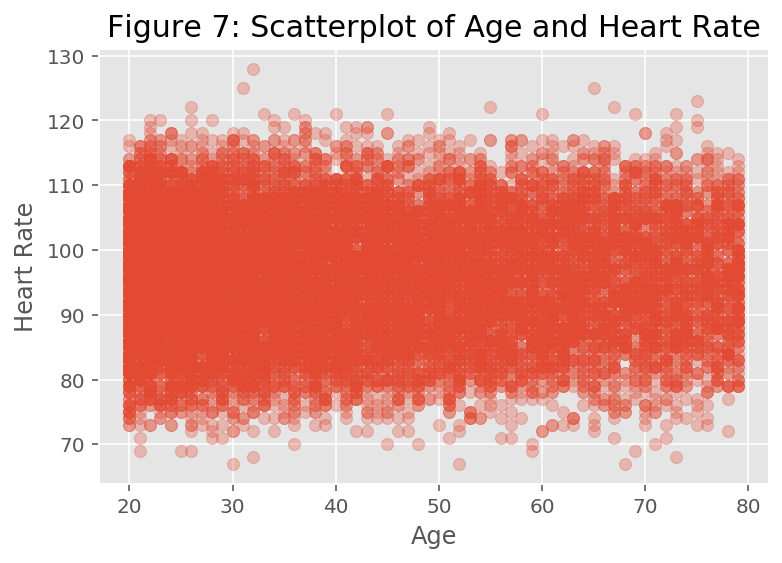

In [21]:
plt.scatter(exercise_df['Age'], exercise_df['Heart_Rate'], alpha = 0.3)
plt.title('Figure 7: Scatterplot of Age and Heart Rate', fontsize = 15)
plt.xlabel('Age')
plt.ylabel('Heart Rate')
plt.show();

In figure 7, we see no visual trend in the scatterplot between 'Age' and 'Heart Rate' of the participants with the majority being centred around 95 BPM.

**Scatter plot of weight and Heart Rate:**

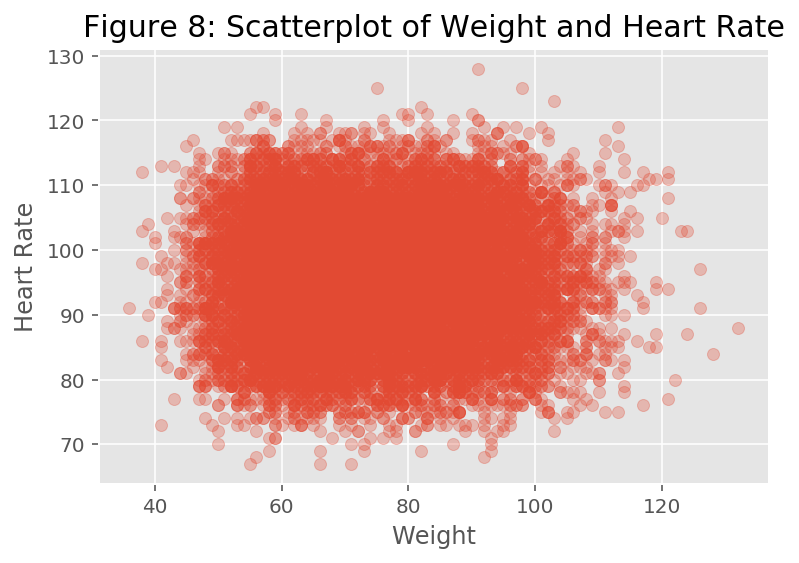

In [22]:
plt.scatter(exercise_df['Weight'], exercise_df['Heart_Rate'], alpha = 0.3)
plt.title('Figure 8: Scatterplot of Weight and Heart Rate', fontsize = 15)
plt.xlabel('Weight')
plt.ylabel('Heart Rate')
plt.show();

In figure 8, we see no association between 'Weight' and 'Heart Rate' of the participants as this scatterplot is non-linear with clustering towards the middle of the plot.

**Boxplot of Duration by Gender:**

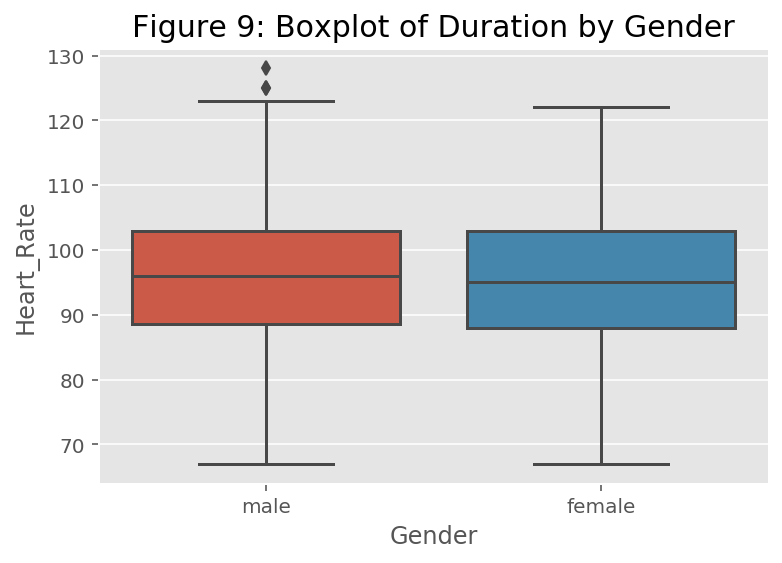

In [23]:
sns.boxplot(exercise_df['Gender'], exercise_df['Heart_Rate']);
plt.title('Figure 9: Boxplot of Duration by Gender', fontsize = 15)
plt.show();

Figure 9 displays no trend between heart rate and the gender of the participant. It can be observed that the median heart rate for both male and female is almost similar.

**Scatterplot of Duration and Heart Rate:**

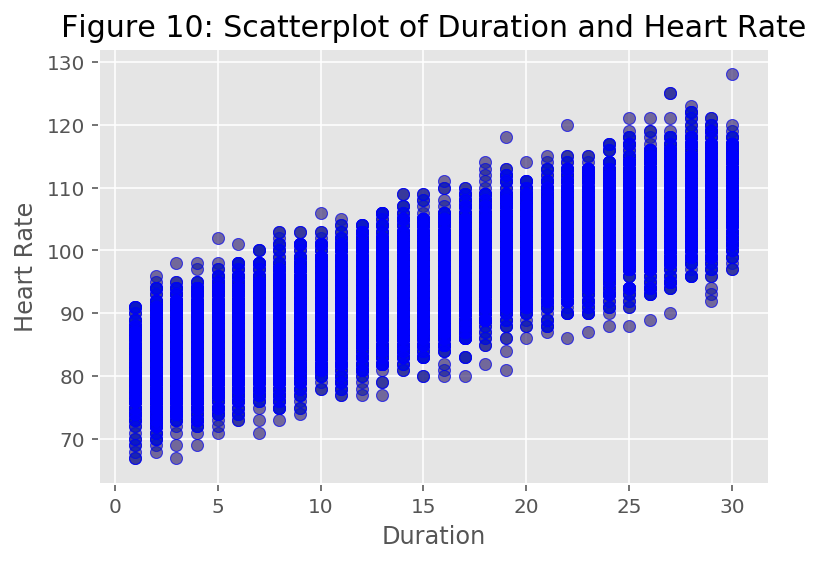

In [24]:
for color in ['red', 'green', 'blue']:
    plt.scatter(exercise_df['Duration'], exercise_df['Heart_Rate'], c=color, alpha=0.3, edgecolors='blue')
    plt.title('Figure 10: Scatterplot of Duration and Heart Rate', fontsize = 15)
    plt.xlabel('Duration')
    plt.ylabel('Heart Rate')
plt.show();

In figure 10, we observe a pattern of linear increase in the scatterplot which states that there is a direct relation between the amount of time a user spent exercising and their heart rate.

**Scatter plot of Body Temperature and Heart Rate:**

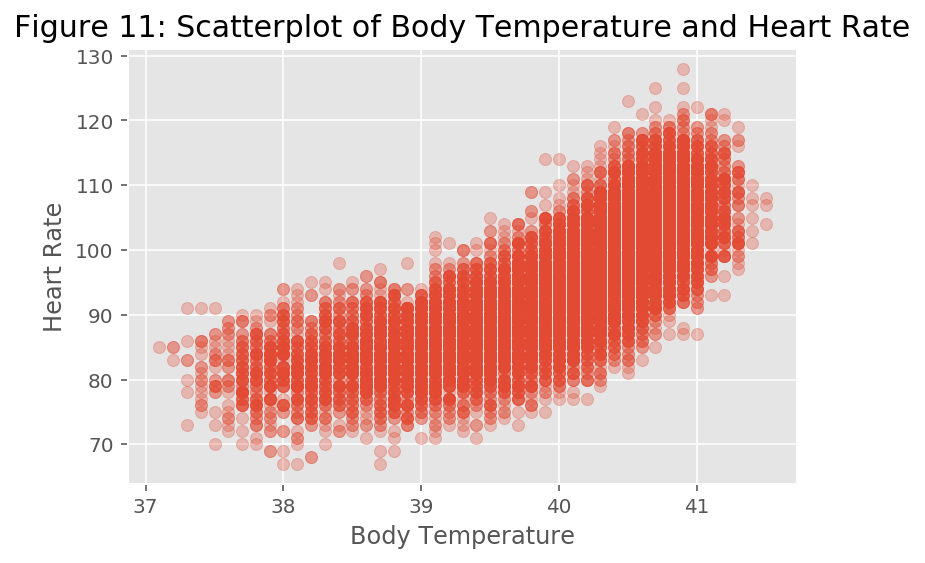

In [25]:
plt.scatter(exercise_df['Body_Temp'], exercise_df['Heart_Rate'], alpha = 0.3)
plt.title('Figure 11: Scatterplot of Body Temperature and Heart Rate', fontsize = 15,)
plt.xlabel('Body Temperature')
plt.ylabel('Heart Rate')
plt.show();

At normal body temperature, heart rate tends to be the same but as the temperature increases, the heart rate shows an exponential increase, especially above 39˚C, this could be because the user is exercising and shows how body temperature is linked to heart rate.

# <font color=4284A3>Statistical Modelling and Evaluation</font> <a id='1003'></a>
------

# Full Model 
---
After exploring the data, it is now time to use multiple linear regression method to predict heart rate using the features present in the exercise data. Before that, let's check the data.

In [26]:
exercise_df.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190,94,29,105,40.8
1,female,20,166,60,14,94,40.3
2,male,69,179,79,5,88,38.7
3,female,34,179,71,13,100,40.5
4,female,27,154,58,10,81,39.8


We will now concatenate all the independent variables together for the regression formula. We will use a short technique to do this much efficiently. 

In [27]:
formula_string_indep_vars = ' + '.join(exercise_df.drop(columns='Heart_Rate').columns)
formula_string = 'Heart_Rate ~ ' + formula_string_indep_vars
print('formula_string: ', formula_string)

formula_string:  Heart_Rate ~ Gender + Age + Height + Weight + Duration + Body_Temp


As there are no categorical ordinal variables in our data, there is no need for one-hot-encoding. Now, we can fit an OLS (ordinary least squares) model to our data.

In [28]:
model_full = sm.formula.ols(formula=formula_string, data=exercise_df)
model_full_fitted = model_full.fit()
model_full_fitted=model_full_fitted
print(model_full_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:             Heart_Rate   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     6671.
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:22:51   Log-Likelihood:                -45434.
No. Observations:               15000   AIC:                         9.088e+04
Df Residuals:                   14993   BIC:                         9.093e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         77.9809      4.869     16.

In [29]:
print(f'R-squared = {model_full_fitted.rsquared:.4f}')
print(f'Adj. R-squared = {model_full_fitted.rsquared_adj:.4f}')

R-squared = 0.7275
Adj. R-squared = 0.7274


The Adjusted R-squared value of the full model is 0.7274, which means that only 72.74% of the variance is explained by the model. As this is a high R2 value, the full model fits the data better to some extent. 

**Now, let's define a data frame to check actual, predicted and residual values.**

In [30]:
residuals_full = pd.DataFrame({'actual': exercise_df['Heart_Rate'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_full.head(10)

,actual,predicted,residual
0,105,108.786092,-3.786092
1,94,93.952462,0.047538
2,88,85.188311,2.811689
3,100,92.949565,7.050435
4,81,90.086244,-9.086244
5,96,102.802646,-6.802646
6,95,101.798063,-6.798063
7,100,104.961478,-4.961478
8,97,100.989141,-3.989141
9,90,95.989943,-5.989943


**We will now plot a scatterplot that will take actual and predicted values.**

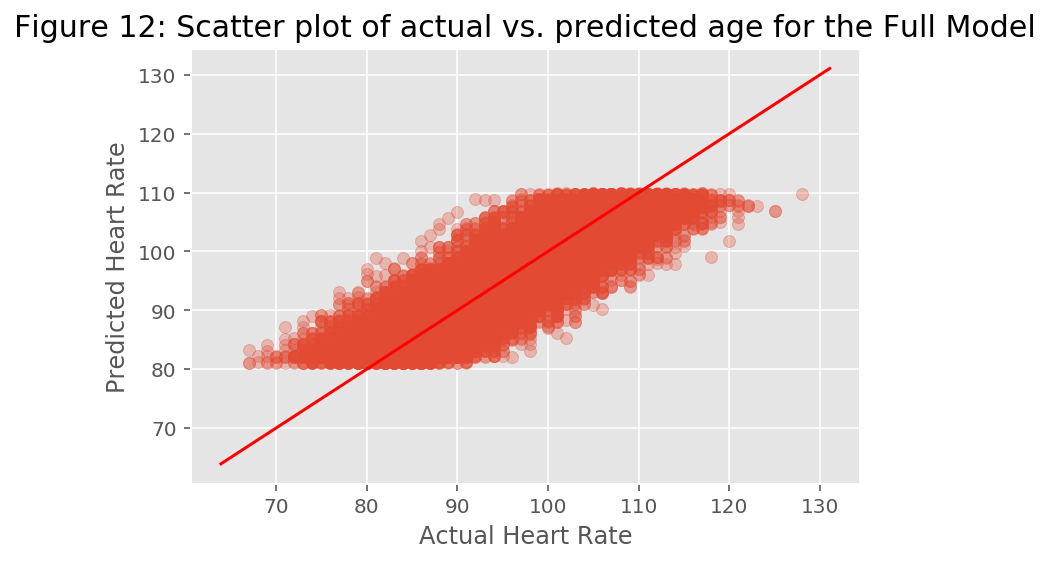

In [31]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope+intercept, xmax*slope+intercept], **kargs)
    
# Scatter plot
plt.scatter(residuals_full['actual'], residuals_full['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="red");
plt.xlabel('Actual Heart Rate');
plt.ylabel('Predicted Heart Rate');
plt.title('Figure 12: Scatter plot of actual vs. predicted age for the Full Model', fontsize=15);
plt.show();

In [32]:
print(residuals_full['predicted'].max())
print(residuals_full['actual'].max())

109.88559594354896
128


As it can be seen from Figure 12 and reconfirmation of max values, the model is not producing a prediction above 109.886 BPM even though the highest heart rate is 128 BPM. Let's have a diagnostics check for the full model.

##  Full model Diagnostics Check

There are four conditions for this Diagnostics check to determine whether this model is reasonable or not.

- Whether there is an evident linear relationship between the target and independent variables
- Presence of normality in the residual distribution
- Independence of residuals
- Whether there is a constant variance of the errors

The first point can be addressed by diagram 10. As actual heart rate increases predicted heart rate also increases for some points. Therefore, there is an evident linear relationship between both variables.

**Firstly, let's create scatter plot of residuals and predicted heart rate**

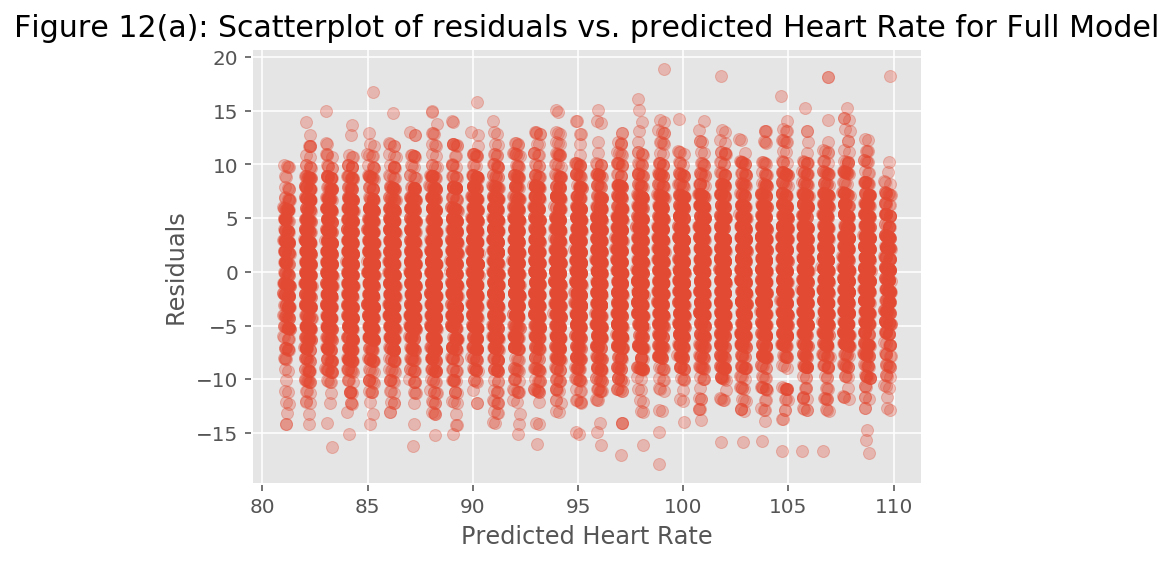

In [33]:
plt.scatter(residuals_full['predicted'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Predicted Heart Rate');
plt.ylabel('Residuals')
plt.title('Figure 12(a): Scatterplot of residuals vs. predicted Heart Rate for Full Model', fontsize=15)
plt.show();

As it can be observed from diagram 12a, the points are randomly scattered and are centred at 0. No evident pattern is noticed. Therefore, there is the constant variance of error present in the plot and residuals are independent.

**Let's now check actual heart rate vs residuals.**

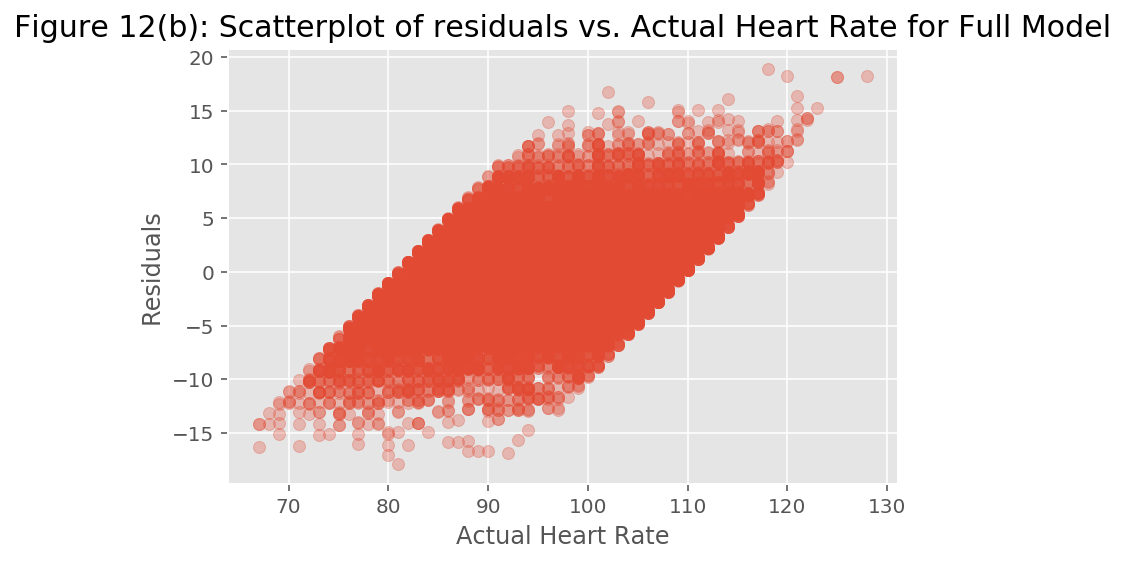

In [34]:
plt.scatter(residuals_full['actual'], residuals_full['residual'], alpha=0.3);
plt.xlabel('Actual Heart Rate');
plt.ylabel('Residuals')
plt.title('Figure 12(b): Scatterplot of residuals vs. Actual Heart Rate for Full Model', fontsize=15)
plt.show();

Unlike diagram 12a, 12b shows a clearly visible pattern and is not entirely centred around the origin. Another thing to notice is that small heart rates are projected big and big heart rates are projected small. For example, the model predicts a much lower heart rate for 128 BPM(this is the maximum BPM in the data).

**Let's now draw two histograms side by side comparing actual heart rate and predicted heart rate.**

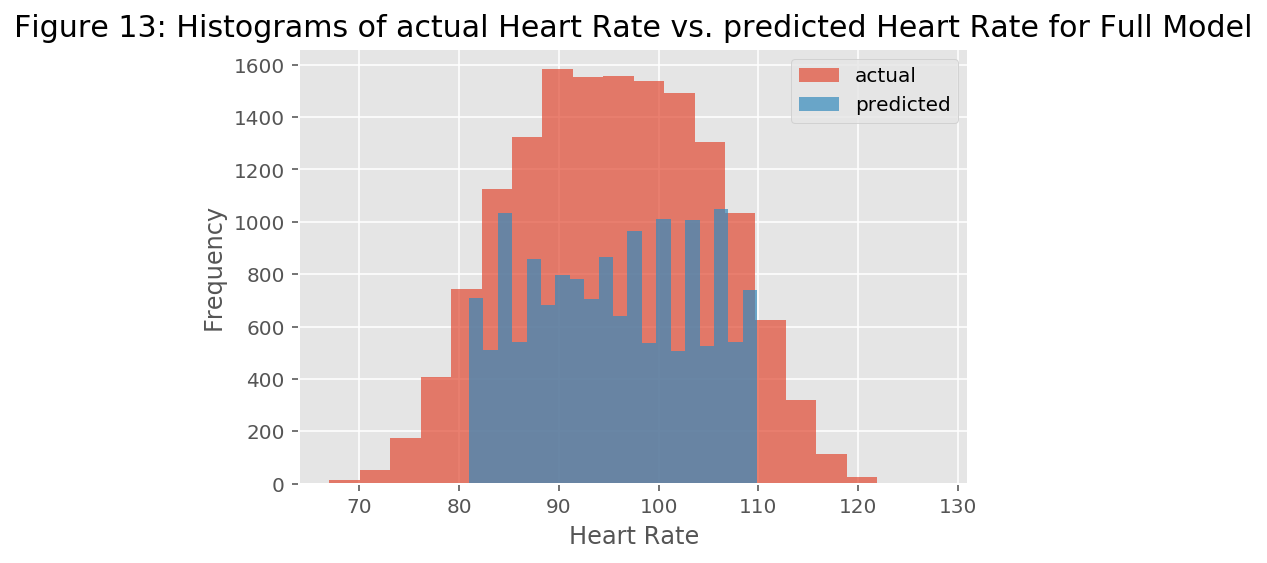

In [35]:
plt.hist(residuals_full['actual'], label='actual', bins=20, alpha=0.7);
plt.hist(residuals_full['predicted'], label='predicted', bins=20, alpha=0.7);
plt.xlabel('Heart Rate');
plt.ylabel('Frequency');
plt.title('Figure 13: Histograms of actual Heart Rate vs. predicted Heart Rate for Full Model', fontsize=15);
plt.legend()
plt.show();

It is evident that there are differences in both distributions. While predicted heart rate has the highest mode around mid 80 BPM, the actual heart rate has a high mode somewhere near 90 BPM.

**Now, let's check the histogram of the residuals.**

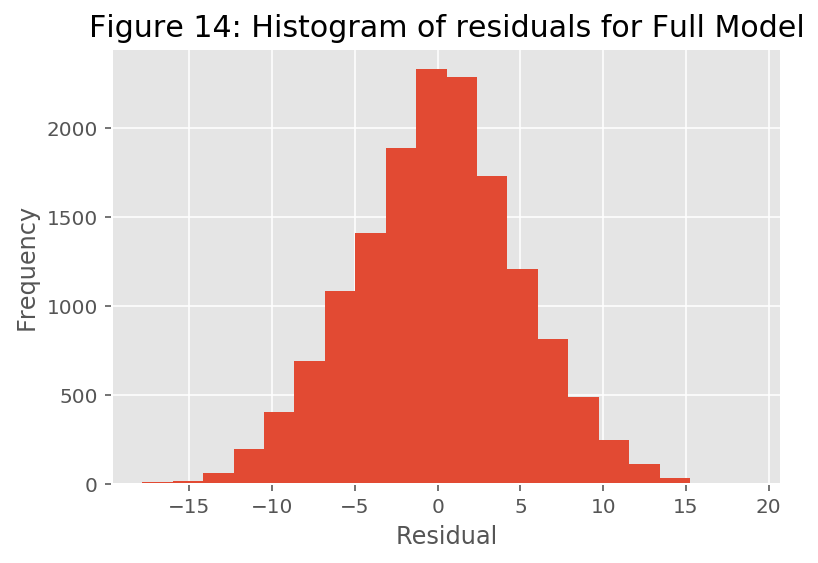

In [36]:
plt.hist(residuals_full['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 14: Histogram of residuals for Full Model', fontsize=15);
plt.show();

From figure 14, we can see that the diagram is symmetric with no skew at all. No outliers are present. Therefore, the normality assumption of linear regression is not violated. Therefore, residuals are normally distributed.

# Backwards Feature Selection
**Using p_values we can now perform backwards feature selection.**

In [37]:
data_encoded = pd.get_dummies(exercise_df, drop_first=True)
data_encoded.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Gender_male
0,68,190,94,29,105,40.8,1
1,20,166,60,14,94,40.3,0
2,69,179,79,5,88,38.7,1
3,34,179,71,13,100,40.5,0
4,27,154,58,10,81,39.8,0


In [38]:
formula_string_indep_vars_encoded = ' + '.join(data_encoded.drop(columns='Heart_Rate').columns)
formula_string_encoded = 'Heart_Rate ~ ' + formula_string_indep_vars_encoded
print('formula_string_encoded:', formula_string_encoded)

formula_string_encoded: Heart_Rate ~ Age + Height + Weight + Duration + Body_Temp + Gender_male


In [39]:
patsy_description = patsy.ModelDesc.from_formula(formula_string_encoded)
linreg_fit = model_full_fitted
p_val_cutoff = 0.05

print('\nPerforming backwards feature selection using p-values:')
while True:
    pval_series = linreg_fit.pvalues.drop(labels='Intercept')
    pval_series = pval_series.sort_values(ascending=False)
    term = pval_series.index[0]
    pval = pval_series[0]    
    if (pval < p_val_cutoff):
        break
    term_components = term.split(':')
    print(f'\nRemoving term: "{term}" with p-value {pval:.3}')
    if (len(term_components) == 1):
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0])]))    
    else:
        patsy_description.rhs_termlist.remove(patsy.Term([patsy.EvalFactor(term_components[0]), 
                                                        patsy.EvalFactor(term_components[1])]))    
        
    linreg_fit = smf.ols(formula=patsy_description, data=data_encoded).fit()

model_reduced_fitted = smf.ols(formula = patsy_description, data = data_encoded).fit()

print("\n***")
print(model_reduced_fitted.summary())
print("***")
print(f"Regression number of terms: {len(model_reduced_fitted.model.exog_names)}")
print(f"Regression F-distribution p-value: {model_reduced_fitted.f_pvalue:.4f}")
print(f"Regression R-squared: {model_reduced_fitted.rsquared:.4f}")
print(f"Regression Adjusted R-squared: {model_reduced_fitted.rsquared_adj:.4f}")


Performing backwards feature selection using p-values:

Removing term: "Age" with p-value 0.707

Removing term: "Weight" with p-value 0.63

Removing term: "Height" with p-value 0.578

Removing term: "Body_Temp" with p-value 0.509

***
                            OLS Regression Results                            
Dep. Variable:             Heart_Rate   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                 2.001e+04
Date:                Sun, 01 Nov 2020   Prob (F-statistic):               0.00
Time:                        11:23:03   Log-Likelihood:                -45434.
No. Observations:               15000   AIC:                         9.087e+04
Df Residuals:                   14997   BIC:                         9.090e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                

**Just like Figure 13. in the full model section, we define a new data frame for actual heart rate(Heart_Rate) vs. predicted heart rate(Heart_Rate) and the residuals for the reduced model.**

In [40]:
residuals_reduced = pd.DataFrame({'actual': data_encoded['Heart_Rate'], 
                            'predicted': model_full_fitted.fittedvalues, 
                            'residual': model_full_fitted.resid})
residuals_reduced.head(10)

,actual,predicted,residual
0,105,108.786092,-3.786092
1,94,93.952462,0.047538
2,88,85.188311,2.811689
3,100,92.949565,7.050435
4,81,90.086244,-9.086244
5,96,102.802646,-6.802646
6,95,101.798063,-6.798063
7,100,104.961478,-4.961478
8,97,100.989141,-3.989141
9,90,95.989943,-5.989943


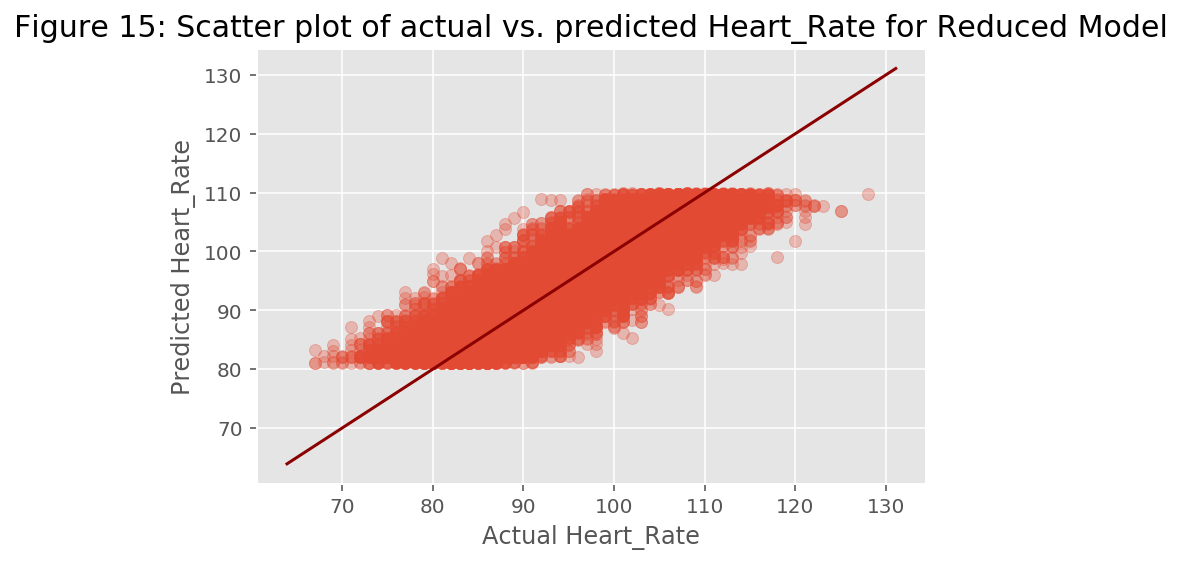

In [41]:
plt.scatter(residuals_reduced['actual'], residuals_reduced['predicted'], alpha=0.3);
plot_line(axis=plt.gca(), slope=1, intercept=0, c="darkred");
plt.xlabel('Actual Heart_Rate');
plt.ylabel('Predicted Heart_Rate');
plt.title('Figure 15: Scatter plot of actual vs. predicted Heart_Rate for Reduced Model', fontsize=15);
plt.show(); 

This model returns an Adjusted R-squared of 0.727, meaning the reduced model does a good job of predicting the heart rate with explaining about 73% of the variance, but with 4 fewer variables that were removed and the p-values are all significant at the 5% level. Though this is the case, from Figure 15, we still have the same issues we faced in other models too. That is, how the model is still not producing a prediction above 109.886 BPM even though the highest actual heart rate is around 128.000 BPM.

# Reduced Model Diagnostic Checks

Now after the obtaining the scatter plot of actual vs. predicted Heart_Rate for Reduced Model we try to gather the data on residuals with respect to Predicted Heart_Rate.

**Plot of residuals and predicted Heart_Rate for Reduced Model:**

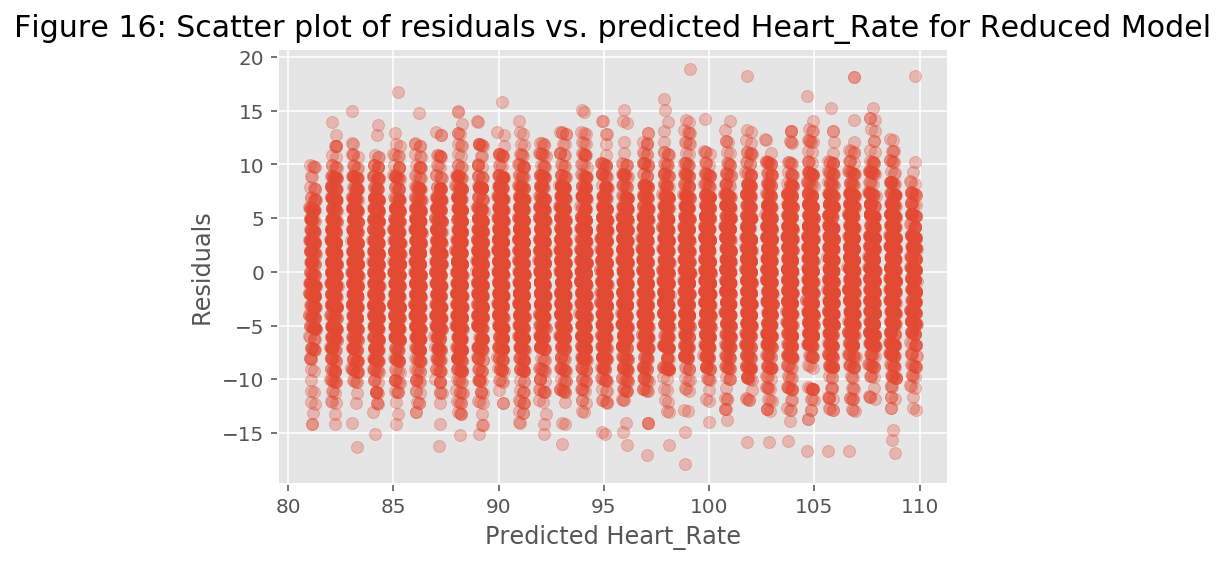

In [42]:
plt.scatter(residuals_reduced['predicted'], residuals_reduced['residual'], alpha=0.3);
plt.xlabel('Predicted Heart_Rate');
plt.ylabel('Residuals')
plt.title('Figure 16: Scatter plot of residuals vs. predicted Heart_Rate for Reduced Model', fontsize=15)
plt.show();

Figure 16 above, almost matches Figure 12(a), the points are randomly scattered and are strongly centred at 0. No evident pattern is noticed. Therefore, there is the constant variance of error present in the plot and residuals are independent.

**We will now check the histogram graph of the residuals for the reduced model obtained above.**

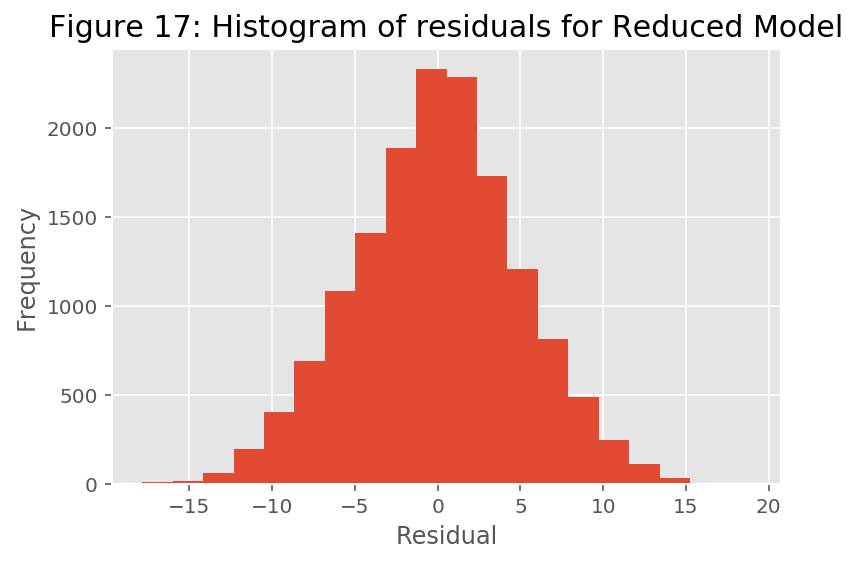

In [43]:
plt.hist(residuals_reduced['residual'], bins = 20);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Figure 17: Histogram of residuals for Reduced Model', fontsize = 15)
plt.show();

In Figure 17, we observe that the histogram of residual obtained is almost symmetric and is normally distributed symmetrically at point 0. This implies that our residuals are almost normally distributed with no right or left-skewed.

# <font color=4284A3>Summary and Conclusions</font> <a id='1004'></a>

Using, mainly duration as our explanatory variable, we got a full model with an adjusted R-squared value of about 72.74% and after doing the backwards variable selection with the commonly used p-value cutoff value of 0.05 the results were maintained with showing the same results as it did but with 4 fewer variables this time around. Our final model has 3 variables all together with a model p-value of 0. The scatter plot in diagnostic check, fig.16, reveals that the relation between residuals and predicted heart rate displays a strong centre at 0 with no evident pattern between them. If we inspect carefully, the trends displayed by the scatter plots exhibit a linear relationship with the constant variability assumption being satisfied after the final reduced model diagnostics check. Along with this, it is noticed that the residuals are, obviously, independent of each other. Meanwhile, the histogram plot between frequency and residuals displays that they are approximately normally distributed and symmetrical at point 0. This signifies that there is no visible violation of the normality assumption on the residuals and that valid inference can be made using our model.

The final multiple linear regression model has an adjusted R-squared value of about 0.727, giving us 72.74%, which is rather high and does a decent job of predicting the heart rate. From this, it can be seen that the variables we used are sufficient enough for precisely predicting using multiple linear regression within a multiple linear regression framework. Due to the model giving us a rather high value, our regression model appears to predict the heart rate correctly within ±72.74 BPM in general with only some issues arising such as the model not being able to predict above 109.886 BPM even though the highest actual heart rate is around 128.000 BPM. This would give some values as underestimated since it wouldn't go over the 109.886 BPM mark. Similarly, the minimum BPM for the actual model is around 67.000 BPM while the predicted is around 80.980 BPM and this will overestimate the lower values for a heartbeat.

# <font color=4284A3>References</font> <a id='1005'></a>

1. impopularGuy. (2018, April 8). How to hyperlink in a Jupyter notebook?. Retrieved October 19, 2020, from https://stackoverflow.com/questions/49535664/how-to-hyperlink-in-a-jupyter-notebook

2. Markdown for Jupyter notebooks cheatsheet. Retrieved October 19, 2020, from https://www.ibm.com/support/knowledgecenter/SSHGWL_1.2.3/analyze-data/markd-jupyter.html

3. J, E. , Med. (2009, September 29). The relationship between body temperature, heart rate and respiratory rate in children. Retrieved October 19, 2020, from https://pubmed.ncbi.nlm.nih.gov/19700579/#:~:text=Conclusion%3A%20Body%20temperature%20is%20an%20independent%20determinant%20of,is%20also%20an%20independent%20determinant%20of%20respiratory%20rate

4. Interpret the key results for One-Way ANOVA. Retrieved October 24, 2020, from https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/anova/how-to/one-way-anova/interpret-the-results/key-results/#:~:text=The%20higher%20the%20R2%20value%2C%20the%20better%20the,check%20the%20residual%20plots%20to%20verify%20the%20assumptions.

5. Makhija, P. A brief primer on linear regression – Part II. Retrieved October 25, 2020, from https://clevertap.com/blog/a-brief-primer-on-linear-regression-part-ii/

6. Gohar, U. (March 5). How to use Residual Plots for regression model validation?. Retrieved October 25, 2020, from https://towardsdatascience.com/how-to-use-residual-plots-for-regression-model-validation-c3c70e8ab378

7. Rudy, K. (2011, November 11). Checking Assumptions about Residuals in Regression Analysis. Retrieved October 25, 2020, from https://blog.minitab.com/blog/the-statistics-game/checking-the-assumption-of-constant-variance-in-regression-analyses#:~:text=The%20errors%20have%20constant%20variance%2C%20with%20the%20residuals,pattern%2C%20the%20errors%20may%20not%20have%20constant%20variance

8. Regression Model Assumptions. Retrieved October 25, 2020, from https://www.jmp.com/en_dk/statistics-knowledge-portal/what-is-regression/simple-linear-regression-assumptions.html

9. OpenIntroOrg. (2016). Normal Probability Plots Explained (OpenIntro textbook supplement) [YouTube Video]. https://www.youtube.com/watch?v=smJBsZ4YQZw&list=PLkIselvEzpM6V9h55s0l9Kzivih9BUWeW&index=2

10. OpenIntroOrg. (2016). Normal Distribution (OpenIntro textbook complement) [YouTube Video]. https://www.youtube.com/watch?list=PLkIselvEzpM6V9h55s0l9Kzivih9BUWeW&v=S_p5D-YXLS4

11. Mine Çetinkaya-Rundel. (2013). Normal approximation to binomial [YouTube Video]. https://www.youtube.com/watch?v=VvksxAZAlrQ&list=PLkIselvEzpM6V9h55s0l9Kzivih9BUWeW&index=4

12. Aksakalli, V. (2019). Predicting Age in Census Data. Retrieved 21 October 2020, from https://github.com/vaksakalli/stats_tutorials/blob/master/Regression_Case_Study1_web.ipynb

13. Aksakalli, V. (2019). Data Preparation for Machine Learning. Retrieved 20 October 2020, from https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/

**Note**: For reference 12, the last name of author is not known, hence, we proceeded with first name. 

[Back to contents section](#1006)